In [1]:
import numpy as np
import matplotlib.pyplot as plt

rolls_obs = np.loadtxt("loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs, return_counts=True)
count_obs = count_obs / count_obs.sum() # normalizing

In [2]:
rolls_fair = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1) # sum up the 10 die
unique2, count_fair = np.unique(rolls_fair, return_counts=True)
count_fair = count_fair / count_fair.sum() # normalizing

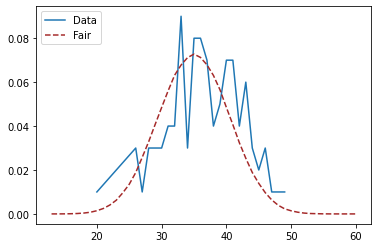

In [3]:
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair", color="brown", ls="--")
plt.legend()
plt.legend(loc=2);

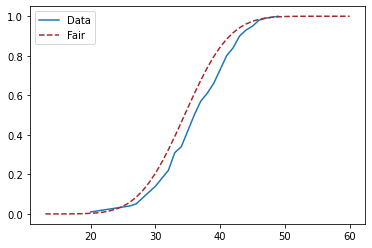

In [4]:
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label="Data")
plt.plot(unique2, cdf_fair, label="Fair", color="brown", ls="--")
plt.legend(loc=2);

In [5]:
from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs, rolls_fair)
print(f"KS test statistic of {statistic:.3f}, p-value of {pvalue:.3f}")

# statistic is the maximum vertical distance between our observed rolls and the simulated rolls (between the empirical cdfs)
# pvalue is the probability of getting that maximum vertical distance if the two distributions came from the same underlying distribution
# the greater the distance between the CDFs, the greater the evidence we have to reject the null hypothesis that both distributions come from the same underlying distribution

KS test statistic of 0.135, p-value of 0.047


# Anderson-Darling Test

An improvement on the KS test that gives more weight to the tails of the distribution (whilst the K-S test gives more weight in the center). The default test requires testing against analytic distributions (like the KS test), however you can also test two observed distributions.

In [6]:
from scipy.stats import anderson_ksamp

statistic, critical_values, sig_lvl = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, sig-level of {sig_lvl:.9f}")
print(f"Test critical values are {critical_values}")
print("Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")

AD test statistic of 5.36868, sig-level of 0.002564237
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig-level analgous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]
